---

# Which games are successful?

The data is provided by the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources.  

### Purpose of the analysis
The goal is to identify patterns that determine whether a game succeeds or not. This will allow to spot potential big winners and plan advertising campaigns.

## Initialization

In [2]:
pip install sidetable -qq

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Downloading necessary libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import sidetable as stb
from functools import reduce

In [4]:
#Downloading dataframe
data = pd.read_csv('/datasets/games.csv')

In [5]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3958,Crash: Mind Over Mutant,PS2,2008.0,Platform,0.25,0.19,0.00,0.06,73.0,6.5,E10+
5711,Mario Golf,GB,1999.0,Action,0.00,0.00,0.31,0.00,NaN,NaN,NaN
8017,Jewel Master: Cradle of Athena,DS,2010.0,Puzzle,0.17,0.00,0.00,0.01,NaN,tbd,E10+
3655,Shrek 2,XB,2004.0,Platform,0.40,0.13,0.00,0.02,72.0,8.4,E
4111,Theme Park Roller Coaster,PS2,2000.0,Strategy,0.23,0.18,0.00,0.06,82.0,7.9,E
3867,Rune Factory 2: A Fantasy Harvest Moon,DS,2008.0,Role-Playing,0.32,0.03,0.15,0.03,77.0,7.9,E
11048,Kawashima Ryuuta Kyouju Kanshuu Nouryoku Train...,PSP,2006.0,Misc,0.00,0.00,0.09,0.00,NaN,NaN,NaN
15896,Kimi ni Todoke: Sodateru Omoi,DS,2009.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
15884,Mana Khemia 2: Ochita Gakuen to Renkinjutsushi...,PSP,2009.0,Role-Playing,0.00,0.00,0.02,0.00,NaN,NaN,NaN
15364,Atari Flashback Classics: Volume 1,XOne,2016.0,Misc,0.02,0.00,0.00,0.00,NaN,tbd,E


## Replacing column names

In [6]:
#Replacing the column names (make them lowercase).

data.columns = data.columns.str.lower()

In [7]:
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14796,Star Trek: Tactical Assault,PSP,2006.0,Strategy,0.02,0.00,0.00,0.00,64.0,7.9,E
6398,Ratatouille,X360,2007.0,Action,0.23,0.02,0.00,0.02,56.0,tbd,E
1340,Disney's DuckTales,GB,1988.0,Platform,0.82,0.23,0.35,0.03,NaN,NaN,NaN
9195,Wild ARMs XF,PSP,2007.0,Role-Playing,0.07,0.00,0.06,0.01,64.0,6.6,E10+
16644,Eve: Burst Error R,PSV,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
4261,Bloody Roar II,PS,1999.0,Fighting,0.25,0.17,0.00,0.03,NaN,NaN,NaN
7594,Warriors Orochi,PSP,2008.0,Action,0.02,0.00,0.18,0.00,62.0,6.6,T
1360,Rayman Raving Rabbids,Wii,2006.0,Misc,1.22,0.06,0.02,0.11,76.0,7.9,E
15997,Triggerheart Exelica,DC,2007.0,Shooter,0.00,0.00,0.02,0.00,NaN,NaN,NaN
6912,G.I. Joe: The Rise of Cobra,X360,2009.0,Action,0.17,0.05,0.00,0.02,42.0,4.7,T


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Changing Data Types

In [9]:
#Changing data types

#year_of_release - a column that shows the year the game was released. Since a year can't have a decimal, it is suggested that this column be changed to an integer type. 
data['year_of_release'] = data['year_of_release'].astype('Int64', errors ='ignore')
#crirtic_score = a column, that describes a score given to a game by critics. Since the scale of the score is 0-100, one could suggest chsanging the column type to integer type.
#data['critic_score'] = data['critic_score'].astype('Int64', errors= 'ignore')


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


## Missing Values 

**First, let's have a look at the distribution of missing values in the dataframe.**

In [11]:
data.stb.missing(style=True)

,missing,total,percent
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
user_score,"6,701","16,715",40.09%
year_of_release,269,"16,715",1.61%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


### Dropping missing values in name and genre columns

There are only two missing values in both name and genre columns, which account for only 0.01% of missing values. Therefore, it would make sense to just drop them.

In [12]:
#Dropping missing values in name and genre columns
data.drop(data[data['name'].isna()].index, inplace=True)
data.drop(data[data['genre'].isna()].index, inplace=True)
data.stb.missing(style=True)

,missing,total,percent
critic_score,"8,576","16,713",51.31%
rating,"6,764","16,713",40.47%
user_score,"6,699","16,713",40.08%
year_of_release,269,"16,713",1.61%
name,0,"16,713",0.00%
platform,0,"16,713",0.00%
genre,0,"16,713",0.00%
na_sales,0,"16,713",0.00%
eu_sales,0,"16,713",0.00%
jp_sales,0,"16,713",0.00%


### Filling missing values in year_of_release column

It is possible to fill in missing values in year_of_release column by using the name of the game and the min date of release on other platforms.

In [13]:
data['year_of_release'] = data['year_of_release'].fillna(data.groupby('name')['year_of_release'].transform('min'))
data['year_of_release'].isna().sum()



146

In [14]:
data.stb.missing(style=True)

,missing,total,percent
critic_score,"8,576","16,713",51.31%
rating,"6,764","16,713",40.47%
user_score,"6,699","16,713",40.08%
year_of_release,146,"16,713",0.87%
name,0,"16,713",0.00%
platform,0,"16,713",0.00%
genre,0,"16,713",0.00%
na_sales,0,"16,713",0.00%
eu_sales,0,"16,713",0.00%
jp_sales,0,"16,713",0.00%


The 123 missing values in years_of release have been successfully filled and now there are 146 of them, that account for less, than 1%. This number of rows is insignificant for further analysis and could be dropped.

In [15]:
data.drop(data[data['year_of_release'].isna()].index, inplace=True)
data.stb.missing(style=True)

,missing,total,percent
critic_score,"8,492","16,567",51.26%
rating,"6,699","16,567",40.44%
user_score,"6,633","16,567",40.04%
name,0,"16,567",0.00%
platform,0,"16,567",0.00%
year_of_release,0,"16,567",0.00%
genre,0,"16,567",0.00%
na_sales,0,"16,567",0.00%
eu_sales,0,"16,567",0.00%
jp_sales,0,"16,567",0.00%


The user_score missing values include both NaN and tbd values. The reason why they are missing could stem from the lack of users or a place where the game could be evaluated. <br> The NaN values can be filled with the user_score mean values of the same game and tbd values can be filled with -1, since one can expect a real 0 score for a game.

In [16]:
#Finding out the number of rows with 'tbd' values
data[data['user_score']=='tbd']
    
    
    

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [17]:
#Replacing 'tbd' values with -1 
data['user_score']= data['user_score'].apply(lambda x: -1 if x=='tbd' else x)


In [18]:
#Checking that 'tbd' values have been filled in
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [19]:
data['user_score'].isna().sum()

6633

The result is 429 missing values filled by dealing with 'tbd' values

In [20]:
#The reason to change to float64 type is to be able to fill missing values with numbers.
data['user_score'] = data['user_score'].astype('float64')

In [21]:

data['user_score']=data['user_score'].fillna(-1)
data['user_score'].isna().sum()

0

In [22]:
data.stb.missing(style=True)

,missing,total,percent
critic_score,"8,492","16,567",51.26%
rating,"6,699","16,567",40.44%
name,0,"16,567",0.00%
platform,0,"16,567",0.00%
year_of_release,0,"16,567",0.00%
genre,0,"16,567",0.00%
na_sales,0,"16,567",0.00%
eu_sales,0,"16,567",0.00%
jp_sales,0,"16,567",0.00%
other_sales,0,"16,567",0.00%


### Filling missing values in critic_score column

In [23]:
critic_score_dict = data.groupby('name')['critic_score'].mean().to_dict()
critic_score_dict

{' Beyblade Burst': nan,
 ' Fire Emblem Fates': nan,
 " Frozen: Olaf's Quest": nan,
 ' Haikyu!! Cross Team Match!': nan,
 ' Tales of Xillia 2': 71.0,
 "'98 Koshien": nan,
 '.hack//G.U. Vol.1//Rebirth': nan,
 '.hack//G.U. Vol.2//Reminisce': nan,
 '.hack//G.U. Vol.2//Reminisce (jp sales)': nan,
 '.hack//G.U. Vol.3//Redemption': nan,
 '.hack//Infection Part 1': 75.0,
 '.hack//Link': nan,
 '.hack//Mutation Part 2': 76.0,
 '.hack//Outbreak Part 3': 70.0,
 '.hack//Quarantine Part 4: The Final Chapter': nan,
 '.hack: Sekai no Mukou ni + Versus': nan,
 '007 Racing': 51.0,
 '007: Quantum of Solace': 63.8,
 '007: The World is not Enough': 61.0,
 '007: Tomorrow Never Dies': nan,
 '1 vs. 100': 38.0,
 '1/2 Summer +': nan,
 '10 Minute Solution': nan,
 '100 All-Time Favorites': nan,
 '100 Classic Books': 70.0,
 '100 Classic Games': nan,
 '1000 Cooking Recipes from ELLE à table': nan,
 '1001 Touch Games': nan,
 '101-in-1 Explosive Megamix': 46.0,
 '101-in-1 Party Megamix Wii': nan,
 '101-in-1 Sports M

In [24]:
data['critic_score'].fillna(data['name'].map(critic_score_dict).round(1), inplace=True)
data.stb.missing(style=True)

,missing,total,percent
critic_score,"7,532","16,567",45.46%
rating,"6,699","16,567",40.44%
name,0,"16,567",0.00%
platform,0,"16,567",0.00%
year_of_release,0,"16,567",0.00%
genre,0,"16,567",0.00%
na_sales,0,"16,567",0.00%
eu_sales,0,"16,567",0.00%
jp_sales,0,"16,567",0.00%
other_sales,0,"16,567",0.00%


The method above allowed filling 960 rows with mean values.
Let's deal with the rest 7532 missing values the same way as with user_score column, by filling NaN with -1.

In [25]:
data['critic_score']= data['critic_score'].fillna(-1)

In [26]:
#Checking that everything works the way it was intended.
data.stb.missing(style=True)

,missing,total,percent
rating,"6,699","16,567",40.44%
name,0,"16,567",0.00%
platform,0,"16,567",0.00%
year_of_release,0,"16,567",0.00%
genre,0,"16,567",0.00%
na_sales,0,"16,567",0.00%
eu_sales,0,"16,567",0.00%
jp_sales,0,"16,567",0.00%
other_sales,0,"16,567",0.00%
critic_score,0,"16,567",0.00%


### Filling missing values in rating column

Rating column values ought to be regrouped by more modern categories and then missing values could be filled with 'unknown', since it is impossible to accurately establish a rating from the data at hand.

In [27]:
data.rating.value_counts()

E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

In [28]:
#EC (Early Childhood), K-A(Kids to adults) rating categories are outdated and fall under one category, which is 'E' category. 
data['rating']=data['rating'].replace(['EC','K-A'], 'E')
data['rating']=data['rating'].replace('K-A', 'unknown')
#RP stands for Rating pending, which, for the purpose of easing further analysis could be changed to unknown.
data['rating']=data['rating'].replace('RP', 'unknown')

#Filling missing values with 'unknown' 
data['rating']=data['rating'].fillna('unknown')

data.rating.value_counts()

unknown    6701
E          3969
T          2930
M          1554
E10+       1412
AO            1
Name: rating, dtype: int64

In [29]:
#Checking that all missing values have been filled.
data.stb.missing(style=True)

,missing,total,percent
name,0,"16,567",0.00%
platform,0,"16,567",0.00%
year_of_release,0,"16,567",0.00%
genre,0,"16,567",0.00%
na_sales,0,"16,567",0.00%
eu_sales,0,"16,567",0.00%
jp_sales,0,"16,567",0.00%
other_sales,0,"16,567",0.00%
critic_score,0,"16,567",0.00%
user_score,0,"16,567",0.00%


As a result of data preprocessing step, column names were standardized, year_of_release column data type was changed to ease future calculations, missing values in name and genre columns were dropped. Other columns with missing values were partially filled and the rest were dropped.

## Calculating Total Sales

Now let's Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [30]:
#Calculating total sales
data['total_sales']= data[['na_sales','eu_sales','jp_sales']].sum(axis=1)
#Changing 'total_sales' column position
new_cols = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score', 'rating']
data=data.reindex(columns=new_cols)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,74.09,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,39.47,-1.0,-1.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,32.23,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,29.82,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,30.38,-1.0,-1.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,-1.0,-1.0,unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,-1.0,-1.0,unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,-1.0,-1.0,unknown
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,-1.0,-1.0,unknown


## Number of games released in different years. Is the data for each period significant?

In [31]:
#Finding the number of games released by year.
released_by_year = data.groupby(['year_of_release'])['name'].nunique().reset_index().sort_values(by='year_of_release').reset_index()
released_by_year

,index,year_of_release,name
0,0,1980,9
1,1,1981,46
2,2,1982,36
3,3,1983,17
4,4,1984,14
5,5,1985,14
6,6,1986,21
7,7,1987,16
8,8,1988,15
9,9,1989,17


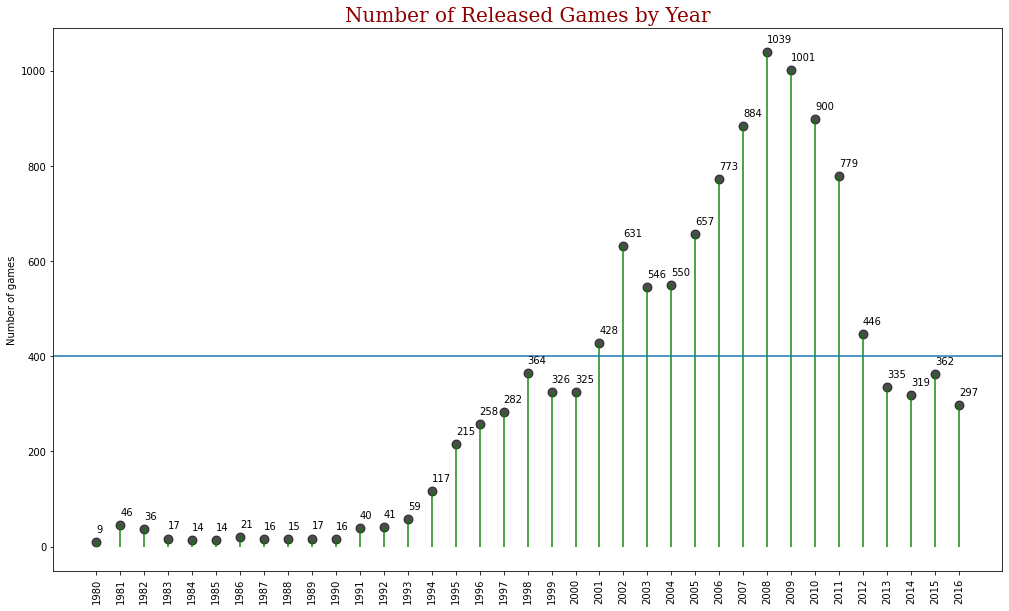

In [32]:
#Visualizing the data above with vertical lines and scatterplot
fig, ax = plt.subplots(figsize=(17,10))
ax.vlines(x=released_by_year['year_of_release'], ymin=0, ymax=released_by_year['name'], color='green', alpha=0.7, linewidth=2)
ax.scatter(x=released_by_year.year_of_release, y=released_by_year.name, s=80, color='black', alpha = 0.7)
ax.set_title("Number of Released Games by Year", fontdict={'family': 'serif',
        'color':  'darkred',
        'weight': 'normal','size':20})
ax.set_ylabel('Number of games')
ax.set_xticks(released_by_year.year_of_release)
ax.set_xticklabels(released_by_year.year_of_release,rotation=90)
ax.axhline(400)

for row in released_by_year.itertuples():
    ax.text(row.year_of_release, row.name+20, s=row.name)
plt.show()
    


The graph features a steady growth of game releases starting in mid 1990-ies, probably owing to the increase of the gaming community and overall technological progress that brought new gaming platforms along with it. The significant data for this analysis would be from 2000 onwards, since this time period marks a new era of game development. For the 2017 prognosis, on the other hand, it is better to use the period between 2012-2016, since this period features a stable annual release pattern.

## Total sales by platform


Let's Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [33]:

total_sales_platform = data.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()
total_sales_platform

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.81
7,DC,15.68
8,GEN,27.46
9,SAT,33.52


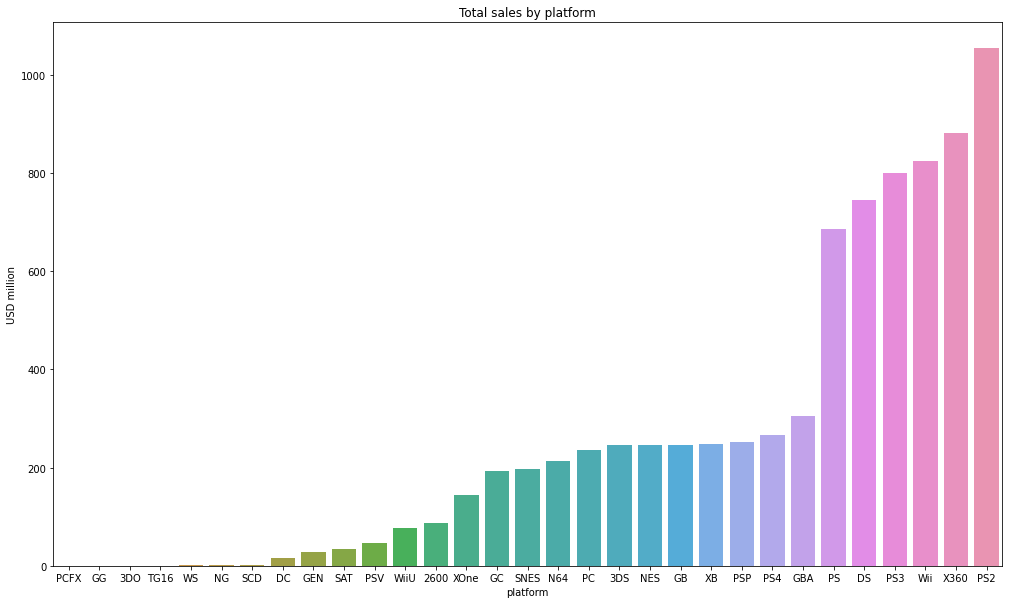

In [34]:
plt.figure(figsize=(17,10))
sns.barplot(data=total_sales_platform, x='platform', y='total_sales')
plt.title('Total sales by platform')
plt.ylabel('USD million')
plt.show()

**According to the graph, there are 6 evident platforms with the greatest total sales. They are: PS2, X360, Wii, PS3, DS and PS.**


## Total game sales by platform since 2000

In [35]:

after2000 = data[data.year_of_release>=2000]


Text(0, 0.5, 'Total Sales in USD mln.')

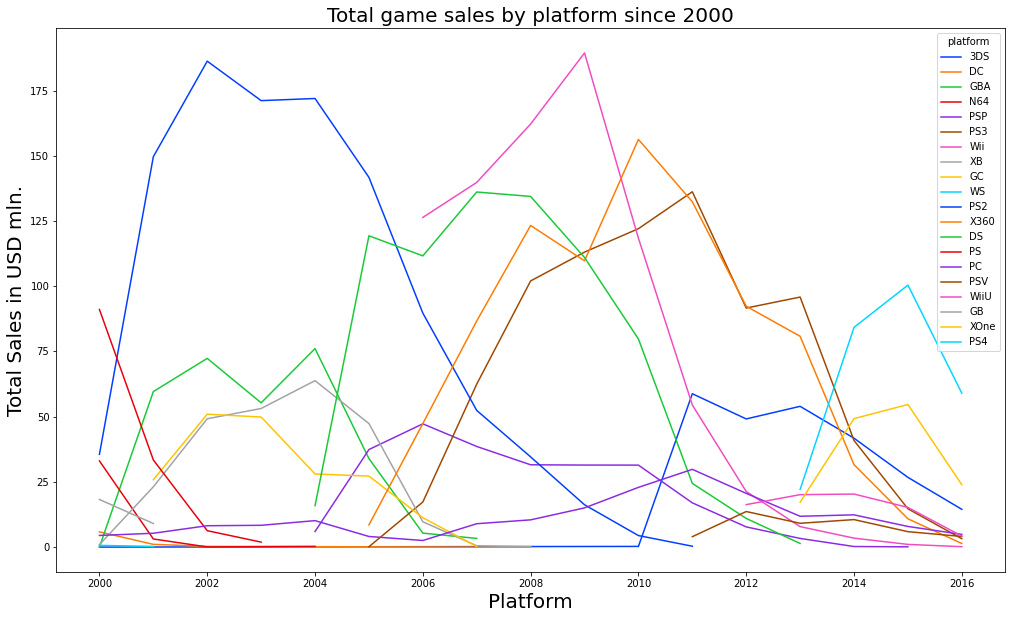

In [36]:
sales_platform_yearly = after2000.groupby([
    'platform', 'year_of_release'])['total_sales'].sum().sort_values().reset_index()
plt.figure(figsize=(17,10))
sns.lineplot(data=sales_platform_yearly, x="year_of_release", y="total_sales", hue="platform", palette='bright')
plt.title('Total game sales by platform since 2000', fontsize=20)
plt.xlabel("Platform", fontsize = 20)
plt.ylabel("Total Sales in USD mln.", fontsize = 20)



**Let's now have a look at all platforms total sales distribution by year to see which platforms are growing or shrinking and select several potentially profitable platforms.<br><br>
It can be inferred from the graph, that PS4, XOne and WiiU (at a stretching point) could be regarded as growing platforms both because they are direct successors of the PS, XBOX, Wii platforms, that all demonstrated outstanding sales figures `and` were released not long ago, only gaining momentum. <br><br>
Among the shrinking platforms are: 3DS, X360, PS3 and Wii. That is probably due to lack of a wide range of games in case of 3DS and all of them are now past their prime age, with X360, PS3 and Wii being on the market for more than 11 years and 3DS for more than 6 years.**

In [37]:

#Determining the period of the data, that will allow to build a prognosis for 2017
after2012 = data[data.year_of_release>=2012]

sales_platform_yearly = after2012.groupby(['platform', 'year_of_release'])['total_sales'].sum().sort_values().reset_index()
sales_platform_yearly_top = sales_platform_yearly.query('platform in ("XOne","PS4", "3DS", "PS3", "WiiU", "X360")')


Text(0.5, 1.0, 'Total game sales by platform since 2012')

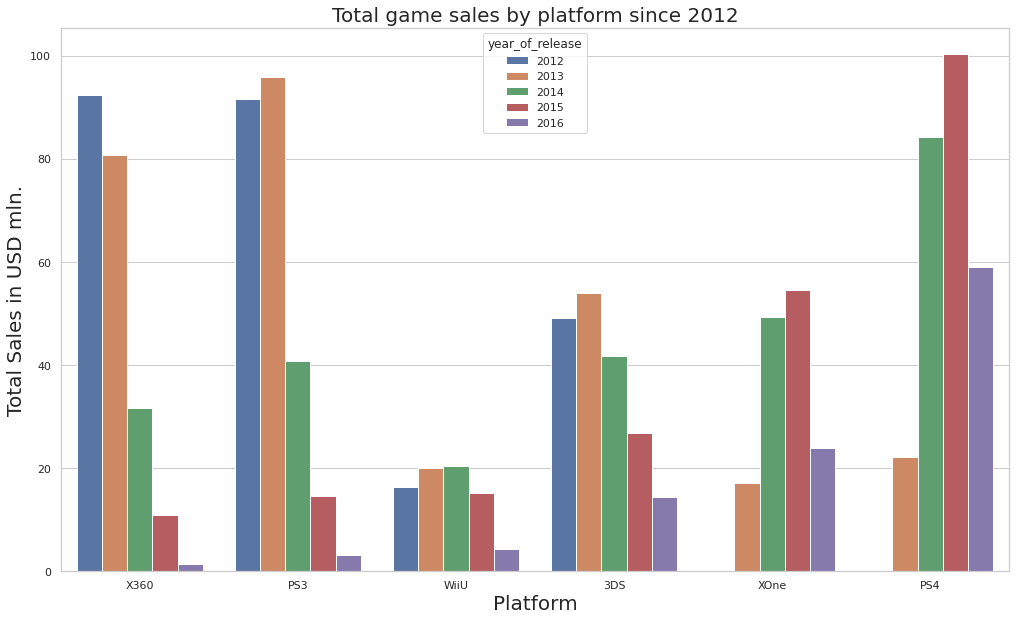

In [38]:
plt.figure(figsize=(17,10))
sns.set(style='whitegrid')
graph = sns.barplot(data=sales_platform_yearly_top, x="platform", y="total_sales", hue="year_of_release")
sns.set()

graph.set_xlabel("Platform", fontsize = 20)
graph.set_ylabel("Total Sales in USD mln.", fontsize = 20)
graph.set_title("Total game sales by platform since 2012", fontsize = 20)



**The graph above demonstrates that after the 2012, with the dawn of the new era in the gaming industry, 3 potentially profitable platforms emerged: PS4, XOne, WiiU**

In [39]:
#Let's build a pivot_table to find out how long it generally takes for new platforms to appear and old ones to fade. 
after2000_pivot = after2000.pivot_table(values='year_of_release', index='platform',aggfunc={'min','max'})


In [40]:
after2000_pivot['age']=after2000_pivot['max']-after2000_pivot['min']
after2000_pivot

,max,min,age
platform,,,
3DS,2016,2000,16
DC,2008,2000,8
DS,2013,2004,9
GB,2001,2000,1
GBA,2007,2000,7
GC,2007,2001,6
N64,2004,2000,4
PC,2016,2000,16
PS,2003,2000,3


In [41]:
after2000_pivot['age'].mean()

7.4

It generally takes 7.4 years for new platforms to appear and old ones to fade.

**Now let's build a box plot for the global sales of all games, broken down by platform and find out, whether the differences in sales are significant.**

In [42]:
#Grouping on platform an name
grouped = after2012.groupby([
    'platform','name'])['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)

#Creating a condition that would help sort platforms by median in a boxplot 
grouped_median = after2012.groupby(['platform'])['total_sales'].median().sort_values(ascending=False)



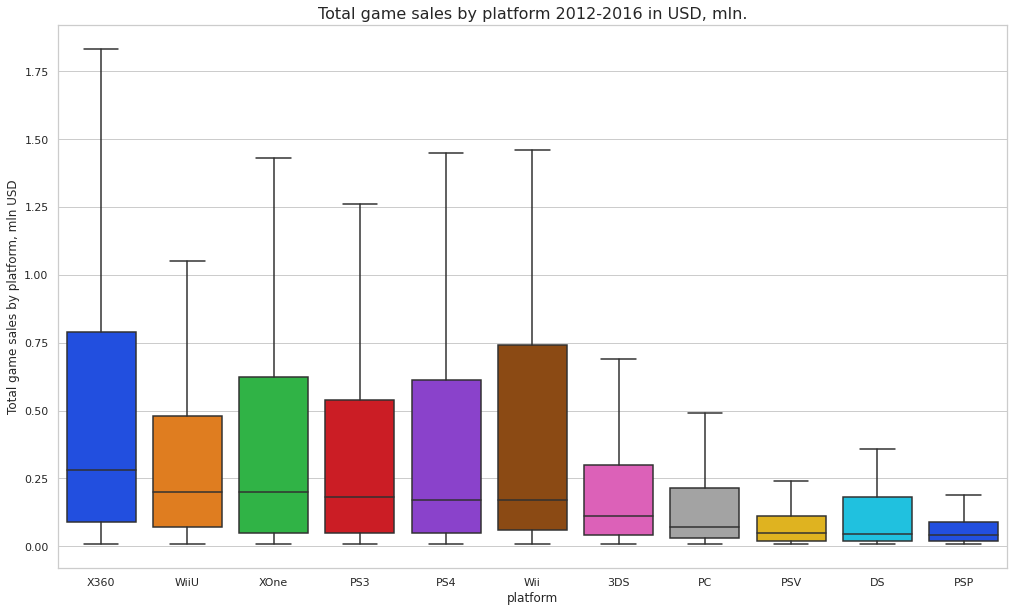

In [43]:
#Plotting a boxplot
plt.figure(figsize=(17,10))

sns.set(style='whitegrid')

sns.boxplot(data=grouped, x="platform", y="total_sales", palette='bright', showfliers=False, order=grouped_median.index).set(ylabel = 'Total game sales by platform, mln USD')
plt.title('Total game sales by platform 2012-2016 in USD, mln.', fontsize = 16)

plt.show()

Conclusion: X360 platform enjoys the biggest median sales of all, at around 0.3 mln USD, followed by WiiU and XOne at 0.2 mln USD median sales. The diffirence in sales becomes most significant with less successful platforms, such as 3DS, PC, PSV, DS, PSP: their median sales are half or evem third of what the top 6 enjoy.

**Let's take a look at how user and professional reviews affect sales for one popular platform - PS4. For this a scatter plot wil be created and the correlation between reviews and sales will be calculated.**

In [44]:
def score_effect(platform,score_type):
    data_grouped=after2012[(after2012.platform==platform)&(after2012[score_type]!=-1)][['total_sales',score_type]]
    pd.plotting.scatter_matrix(data_grouped, figsize=(4,4))
    correlation= data_grouped[score_type].corr(data_grouped['total_sales'])
    if correlation>0.7 :
        result=(f'strong  positive correlation ({correlation.round(2)}) between {platform} and {score_type}')
    elif 0.7>correlation>0.5:
        result =(f'medium  positive correlation ({correlation.round(2)}) between {platform} and {score_type}')
    elif 0.5>correlation>0:
        result =(f'weak  positive correlation ({correlation.round(2)}) between {platform} and {score_type}')
    else:
        result = (f'no  positive correlation ({correlation.round(2)}) between {platform} and {score_type}')
        
    print(result)

weak  positive correlation (0.39) between PS4 and critic_score
no  positive correlation (-0.03) between PS4 and user_score


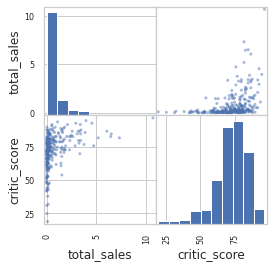

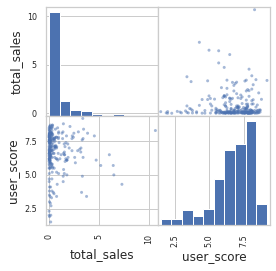

In [45]:
score_effect('PS4','critic_score')
score_effect('PS4','user_score')


**There is only weak positive correlation between PS4 total sales and critic score, while user score has no significant correlation with PS4 total sales.**

## Games by genre distributions (Most popular, Most profitable)

Let's take a look at the general distribution of games by genre. 

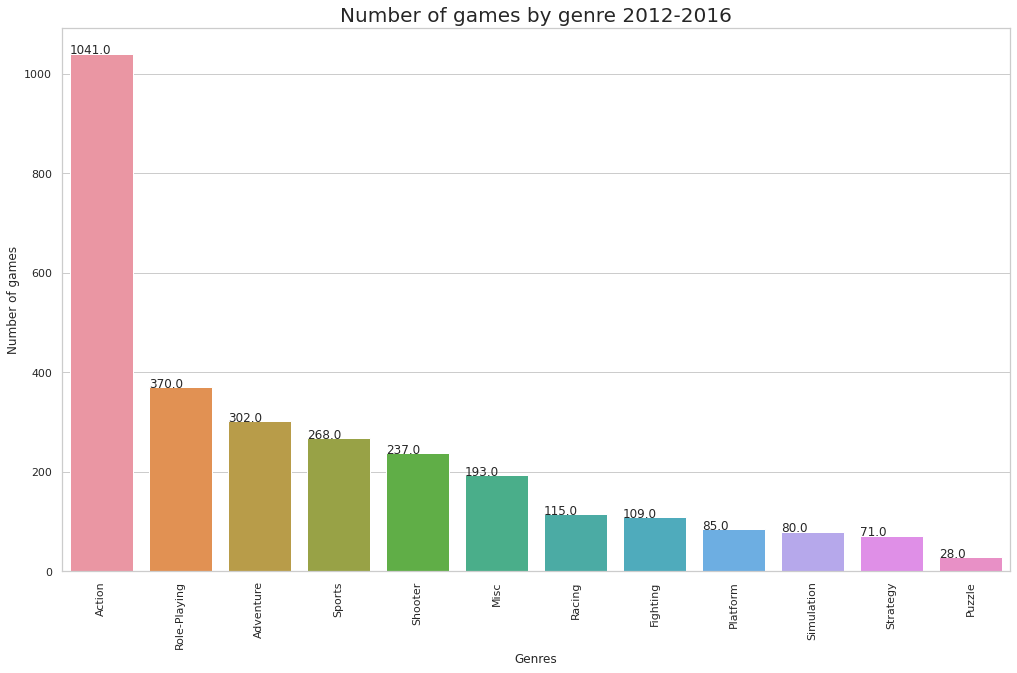

In [49]:
#Grouping data to find out the number of all games by genre from 2012 until 2016
genre_count= after2012.groupby(['genre'])['name'].count().sort_values(ascending=False).reset_index()

#Plotting a barchart
plt.figure(figsize=(17,10))
ax = sns.barplot(data=genre_count, x='genre', y='name', errwidth=0)
plt.title('Number of games by genre 2012-2016', fontsize=20)
plt.ylabel('Number of games')
plt.xlabel('Genres')
ax.tick_params(axis='x', rotation=90)
rect= ax.patches
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy= (p.get_x(),p.get_height()))



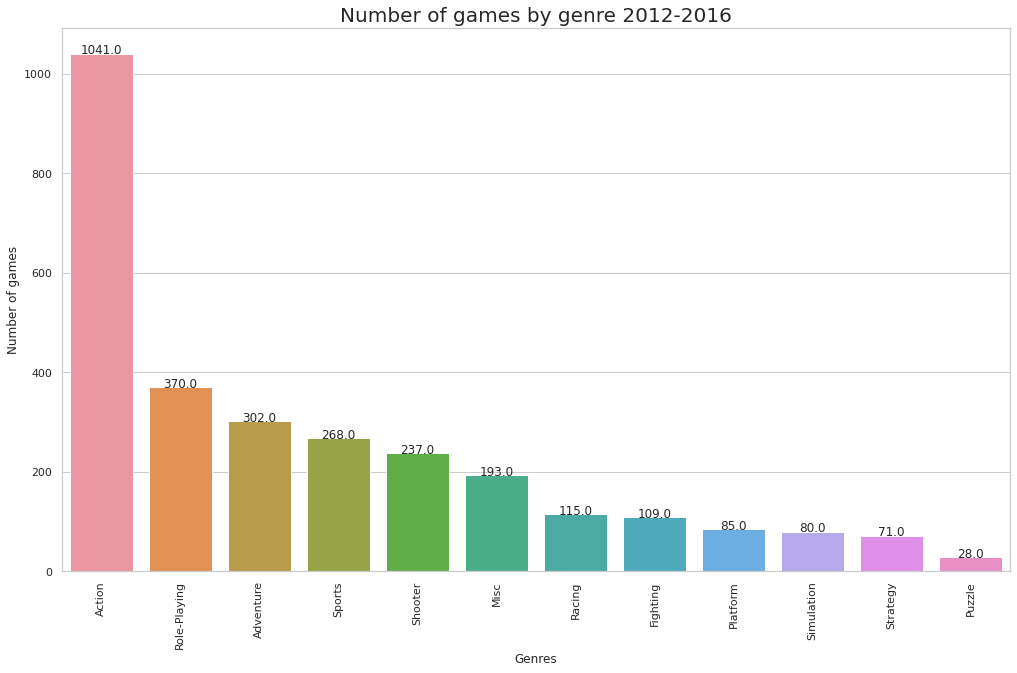

In [62]:
#Grouping data to find out the number of all games by genre from 2012 until 2016
genre_count= after2012.groupby(['genre'])['name'].count().sort_values(ascending=False).reset_index()

#Plotting a barchart
plt.figure(figsize=(17,10))
ax = sns.barplot(data=genre_count, x='genre', y='name', errwidth=0)
plt.title('Number of games by genre 2012-2016', fontsize=20)
plt.ylabel('Number of games')
plt.xlabel('Genres')
ax.tick_params(axis='x', rotation=90)
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                xy= (p.get_x() + p.get_width() / 2, p.get_height()),
                size=12,
                ha='center')

ax.bar_label(ax.containers[0])

The graph above helps establish the most popular genres. The most popular genre is Action with more than 1100 games, that leaves its closest follower far behind, i.e Role-Playing with approx. 380 games.

In [104]:
# Grouping data to find out the most profitable genre from 2012 until 2016
genre_profit= after2012.groupby(['genre'])['total_sales'].sum().sort_values(ascending=False).reset_index()



Text(0.5, 0, 'Genres')

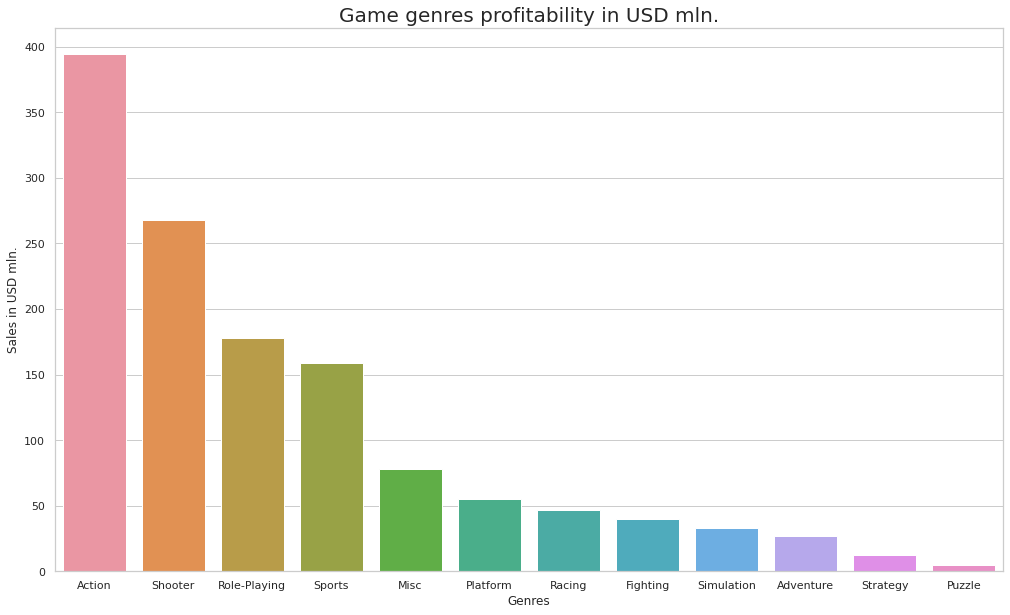

In [105]:
# 
genre_profit_name = after2012.groupby(['genre'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)


plt.figure(figsize=(17,10))
sns.barplot(data=genre_profit_name, x='genre', y='total_sales')
plt.title('Game genres profitability in USD mln.', fontsize=20)
plt.ylabel('Sales in USD mln.')
plt.xlabel('Genres')


Action genre is firmly in the lead both as the most popular and the most profitable genre. There are some changes on the second place, however. The shooter genre is the secod most sold genre, although being the 5th on in terms of popularity. This could mean that shooters are more expensive, than others.

## User profile for each region

In order to understand how different regions compare, for each region (NA, EU, JP) will be determined:<br>
1. The top five platforms by sales. <br>
2. Variations in their market shares from region to region will be described.<br>
3. The top five genres will be established.<br>
4.The question, whether ESRB ratings affect sales in individual regions will be answered.<br>

### Top five platfroms by sales

In [106]:
#Top five platforms by sales in NA region
NA = (after2012.groupby('platform')['na_sales'].sum()).reset_index().sort_values(by='na_sales',ascending=False)
display(NA.head(5))

#Market share variations in NA region
NA1 = (after2012.groupby('platform')['na_sales'].sum()/after2012['na_sales'].sum()).reset_index().sort_values(by='na_sales',ascending=False)
display(NA1.head(5))

,platform,na_sales
9,X360,140.57
4,PS4,108.74
3,PS3,103.74
10,XOne,93.12
0,3DS,55.49


,platform,na_sales
9,X360,0.236929
4,PS4,0.183280
3,PS3,0.174853
10,XOne,0.156953
0,3DS,0.093528


In [107]:
#Top five platforms by sales in EU region
EU = (after2012.groupby('platform')['eu_sales'].sum()).reset_index().sort_values(by='eu_sales',ascending=False)
display(EU.head(5))
#Market share variations in EU region
EU1 =(after2012.groupby('platform')['eu_sales'].sum()/after2012['eu_sales'].sum()).reset_index().sort_values(by='eu_sales',ascending=False)
display(EU1.head(5))

,platform,eu_sales
4,PS4,141.09
3,PS3,107.27
9,X360,74.89
10,XOne,51.59
0,3DS,42.83


,platform,eu_sales
4,PS4,0.277093
3,PS3,0.210672
9,X360,0.147080
10,XOne,0.101320
0,3DS,0.084116


In [108]:
#Top five platforms by sales in JP region
JP = (after2012.groupby('platform')['jp_sales'].sum()).reset_index().sort_values(by='jp_sales',ascending=False)
display(JP.head(5))
#Market share variations in JP region
JP1 = (after2012.groupby('platform')['jp_sales'].sum()/after2012['jp_sales'].sum()).reset_index().sort_values(by='jp_sales',ascending=False)
display(JP1.head(5))


,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01


,platform,jp_sales
0,3DS,0.455295
3,PS3,0.183020
6,PSV,0.109117
4,PS4,0.082771
8,WiiU,0.067472


In [121]:
# Merging three regions DataFrames
data_merge = reduce(lambda left, right:     
                     pd.merge(left , right,
                              on = ['platform'],
                              how = 'outer'),
                     [JP1, NA1, EU1])
data_merge

,platform,jp_sales,na_sales,eu_sales
0,3DS,0.455295,0.093528,0.084116
1,PS3,0.183020,0.174853,0.210672
2,PSV,0.109117,0.018507,0.022310
3,PS4,0.082771,0.183280,0.277093
4,WiiU,0.067472,0.064217,0.049354
5,PSP,0.055544,0.000388,0.001021
6,DS,0.019293,0.008309,0.007424
7,Wii,0.017581,0.030575,0.024235
8,X360,0.008142,0.236929,0.147080
9,XOne,0.001763,0.156953,0.101320


It can be inferred from the data acqured, that:
1. Xbox platforms are most popular in NA region, whereas in JP it is has even not crossed the top 5 threshold.
2. PS platforms are omnipresent, dominating the Eu region and going neck in neck in NA region with Xbox platform.
3. 3DS enjoys the most sales in JP region, while lagging behiond all competitors in NA and EU regions.

### Top five genres by sales

**Let's find out the top five genres per each region (NA, JP, EU)**

,genre,na_sales
0,Action,180.15
8,Shooter,144.79
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


,genre,eu_sales
0,Action,161.70
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29


,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,13.10
9,Simulation,10.41
2,Fighting,9.44


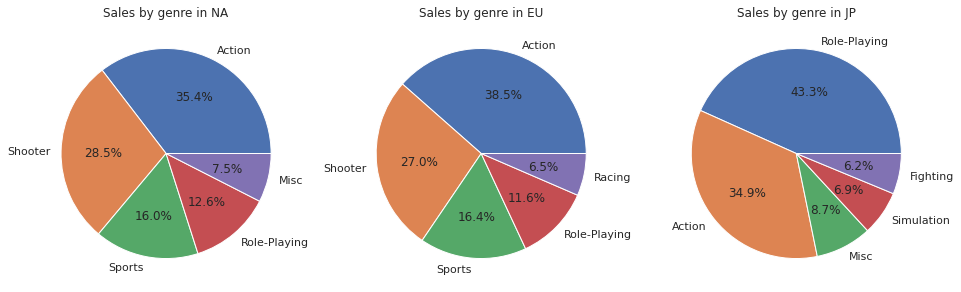

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Grouping top 5 genres in NA region by sales
NA_topgenres = (after2012.groupby('genre')['na_sales'].sum()).reset_index().sort_values(by='na_sales',ascending=False).head(5)
display(NA_topgenres)

# Plotting a pie chart
labels = NA_topgenres['genre']
value = NA_topgenres['na_sales']

#Making percents visible on pie chart
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
plt.subplot(1,3,1)
plt.pie(value, labels=labels, autopct= lambda pct: func(pct, value))
plt.title("Sales by genre in NA")


# Grouping top 5 genres in EU region by sales
EU_topgenres = (after2012.groupby('genre')['eu_sales'].sum()).reset_index().sort_values(by='eu_sales',ascending=False).head(5)
display(EU_topgenres)

# Plotting a pie chart
plt.subplot(1, 2, 2)

labels = EU_topgenres['genre']
value = EU_topgenres['eu_sales']

#Making percents visible on pie chart
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
plt.subplot(1,3,2)

plt.pie(value, labels=labels, autopct= lambda pct: func(pct, value))
plt.title("Sales by genre in EU")


# Grouping top 5 genres in JP region by sales
JP_topgenres = (after2012.groupby('genre')['jp_sales'].sum()).reset_index().sort_values(by='jp_sales',ascending=False).head(5)
display(JP_topgenres)

# Plotting a pie chart
labels = JP_topgenres['genre']
value = JP_topgenres['jp_sales']

#Making percents visible on pie chart
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

plt.subplot(1,3,3)

plt.pie(value, labels=labels, autopct= lambda pct: func(pct, value))
plt.title("Sales by genre in JP")

plt.show()




Conclusion: NA and EU genres popularity is very similar, possibly due to cultural similarity.<br> In JP region the situation is completely different, with Role-playing being the most popular genre that is not even present in top 5 genres NA, EU. The only common popular genre is Action, that accounts for more than a third of all sales.

### ESRB ratings vs. Sales dependence

**Now let's see if ESRB ratings affect sales in individual regions.**

[Text(0.5, 1.0, 'Sales in NA by ESRB ratings'),
 Text(0, 0.5, 'Sales in USD mln.')]

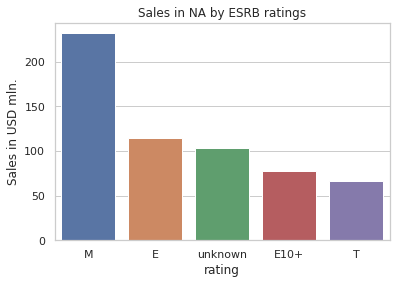

In [56]:
NA_rating = after2012.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=NA_rating, x='rating', y='na_sales').set(
title='Sales in NA by ESRB ratings', ylabel='Sales in USD mln.')

[Text(0.5, 1.0, 'Sales in EU by ESRB ratings'),
 Text(0, 0.5, 'Sales in USD mln.')]

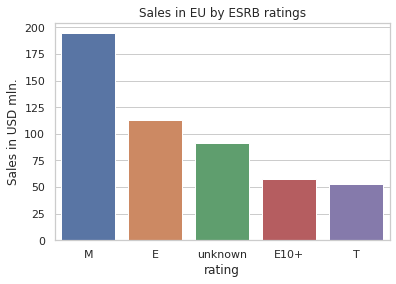

In [57]:
EU_rating = after2012.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=EU_rating, x='rating', y='eu_sales').set(
title='Sales in EU by ESRB ratings', ylabel='Sales in USD mln.')

[Text(0.5, 1.0, 'Sales in JP by ESRB ratings'),
 Text(0, 0.5, 'Sales in USD mln.')]

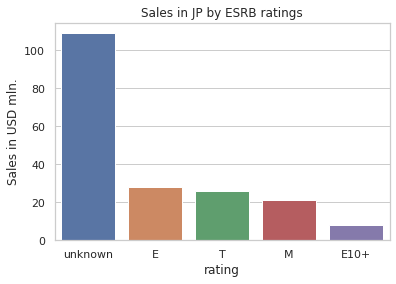

In [58]:
JP_rating = after2012.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=JP_rating, x='rating', y='jp_sales').set(
title='Sales in JP by ESRB ratings', ylabel='Sales in USD mln.')

Conclusion: The effect of ESRB rating on regional sales in JP region is not as strong as it is in EU and NA regions. There bestsellsers have M rating, which is suted for people over 17 years of age.  

## Testing hypothesis

### Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same.

Let's test our first hypothesis, whether average user ratings of the Xbox One and PC platforms are the same and statisticallty significant. <br>

H0: The difference in average user scores for the Xbox One and PC platforms is statistically insignificant.<br>
H1: The difference in average user scores for the Xbox One and PC platforms is statistically significant. Games on Xbox have higher ratings.<br>

For this test we will set our significance level at 5%. <br>



But first, it would be useful to know how the two samples means and variances compare.

In [59]:
#Finding out the user score mean and var for XOne
Hypothesis1_XOne = after2012[after2012.platform=='XOne']['user_score']
print('The samples mean is:', Hypothesis1_XOne.mean(), 'The sample var is:', np.var(Hypothesis1_XOne))

#Finding out the user score mean and var for PC
Hypothesis1_PC = after2012[after2012.platform=='PC']['user_score']
print('The samples mean is:', Hypothesis1_PC.mean(), 'The sample var is:', np.var(Hypothesis1_PC))

The samples mean is: 4.542105263157895 The sample var is: 12.36705305774558
The samples mean is: 5.1607843137254905 The sample var is: 10.177207227989236


Looks like the two samples are different at first glance, but are they really? <br> Let's find that out by conducting a hypothesis test.

In [60]:
#Testing the null hypothesis

alpha = 0.05 # setting a critical statistical significance level

results = st.ttest_ind(Hypothesis1_XOne,Hypothesis1_PC,alternative='two-sided', equal_var = False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis: the average user ratings of the Xbox One and PC platforms are not the same.')
else:
    print('We cannot reject the null hypothesis')


p-value: 0.040080347465044186
We reject the null hypothesis: the average user ratings of the Xbox One and PC platforms are not the same.


In [61]:
#Testing the alternative hypothesis


alpha = 0.05 # setting a critical statistical significance level

results = st.ttest_ind(Hypothesis1_XOne,Hypothesis1_PC,alternative='greater', equal_var = False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis: The average user ratings of the Xbox One are statistically lower than those of PC.')
else:
    print('We cannot reject the alternative hypothesis. The average user ratings of the Xbox One are statistically higher than those of PC.')

p-value: 0.9799598262674779
We cannot reject the alternative hypothesis. The average user ratings of the Xbox One are statistically higher than those of PC.


### Hypothesis  2: Average user ratings for the Action and Sports genres are different.


Now it is time to test our second hypothesis, whether average user ratings for the Action and Sports genres are different and statisticallty significant.<br>
For this test we will set our significance level at 5%. <br>
H0: The difference in average user scores for the Action and Sports genres is statistically insignificant.<br>
H1: The difference in average user scores for the Action and Sports genres is statistically significant, action genre games have higher user scores.<br>

Like with the first hypothesis, it would be useful to know how the two samples means and variances compare.

In [62]:
#Finding out the user score mean and var for Action genre
Hypothesis2_Action = after2012[after2012.genre=='Action']['user_score']
print('The samples mean is:', Hypothesis2_Action.mean(), 'The sample var is:', np.var(Hypothesis2_Action))

#Finding out the user score mean and var for Sports genre
Hypothesis2_Sports = after2012[after2012.genre=='Sports']['user_score']
print('The samples mean is:', Hypothesis2_Sports.mean(), 'The sample var is:', np.var(Hypothesis2_Sports))

The samples mean is: 2.996157540826129 The sample var is: 16.295854591895587
The samples mean is: 3.6973880597014923 The sample var is: 10.44861258075295


The variances stand even more apart, so it is necessary to take into account when testing hypothesis by changing equal_var to False.

In [63]:
#Testing the null hypothesis


alpha = 0.05# setting a critical statistical significance level

results = st.ttest_ind(Hypothesis2_Sports,Hypothesis2_Action,alternative='two-sided', equal_var = False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis: The average user ratings of the Action genre are statistically significant.')
else:
    print('We cannot reject the null hypothesis: The average user ratings of the Action genre are statistically insignificant.')
    
    

p-value: 0.0028756411254120106
We reject the null hypothesis: The average user ratings of the Action genre are statistically significant.


In [64]:
#Testing the alternative hypothesis

alpha = 0.05# setting a critical statistical significance level

results = st.ttest_ind(Hypothesis2_Sports,Hypothesis2_Action,alternative='greater', equal_var = False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis: The average user ratings of the Action genre are statistically lower than those of Sports genre.')
else:
    print('We cannot reject the null hypothesis: The average user ratings of the Action genre are statistically higher than those of Sports genre.')
    
    

p-value: 0.0014378205627060053
We reject the null hypothesis: The average user ratings of the Action genre are statistically lower than those of Sports genre.


## General conclusion

1. Data Preprocessing
The data went through several preprocessing steps: replacing column values, changing data types, replacing missing values, calculating total sales.
2. Data analysis
The overall game release history was analysed, revealing 3 distinct eras (1980-1999, 2000-2011,2012-2016). The period the data should be taken for analysis and prognosis was deterrmined. <br>
The top 6 platforms with the greatest total sales were found (PS2, X360, Wii, PS3, DS and PS), as well as platforms that used to be popular but now have zero sales: (PS, PS2, GBA, DS, Wii, Xbox).
It was also estimated, that a platform's lifespan is approximately 7 years from release to discontinuation.



Platforms, that are leading in sales were found: PS4, XOne and WiiU (at a stretching point), because they are direct successors of the PS, XBOX, Wii platforms, that all demonstrated outstanding sales figures `and` were released not long ago, only gaining momentum. <br><br>
Growing and shrinking platforms were analysed:
Among the shrinking platforms are: 3DS, X360, PS3 and Wii. That is probably due to lack of a wide range of games in case of 3DS and all of them are now past their prime age, with X360, PS3 and Wii being on the market for more than 11 years and 3DS for more than 6 years.
Finally, several potentially profitable platforms were selected: PS4, XOne, WiiU. All of them demonstraed growth since 2012, the dawn of the new, most contemporary gaming industry era.<br>

It was analysed how user and professional reviews affect sales for PS4 platform. There is only weak positive correlation between PS4 total sales and critic score, while user score has no significant correlation with PS4 total sales.

Games were distributed by genre and analysed. As a result, the most profitable genres turned out to be Action with more than 1100 games, followed by Role-Playing with approximately 380 games. 
 In terms of profitability, Action genre is once again firmly in the lead, with the shooter genre being the secod most sold genre, although being the 5th on in terms of popularity. This could mean, that shooters are more expensive, than other genres.
3. User profile by region
The data grouped by different regions was used create a user profile for each region. (NA, EU, JP). Thus, top five platforms by sales and top five genres were found. Also, it was found out whether ESRB ratings affect sales in individual regions.  

Overall, JP region stands out from the rest both is terms of popular platforms and popular genres. This region is the only one that is dominated by Nintendo platforms, that account for nearly half the market share - 45%. Sony platforms combined have the share of 38% of the market and WiiU has 7% with no Xbox platforms in sight.

Also, JP region is unique in genre preference: 43% buy Role-Play games, 35% - Action and the rest prefer simulators, miscellaneous, fightings. This is nothing like EU NA regions, where genre sales distribution is virtually identical.  

In NA and EU regions the most popular genres are Action 35-38%, Shooter 27-28%, Sports 16%. In terms of platforms sales Xbox and PS dominate the market in both Na and EU regions. In NA  Microsoft account for 39% of sales and Sony about 35%, while in EU the distribution is in favor of Sony 48% to Microsoft 24% of sales. 

ESRB ratings indeed affect sales in NA and EU regions, where the bestsellers have rating M (17+ years old). 
By contrast, game sales are not as affected by ESRB In JP region: the best selling games there are without a rating.

4. Hypotheses testing
Finally, two hypotheses were tested:
4.1 Average user ratings of the Xbox One and PC platforms are the same.
One can conclude, that, user ratings of the Xbox One and PC platforms are statistically not the same and that Xbox ratings are statistically higher.
4.2 Average user ratings for the Action and Sports genres are different. The two samples as a result are statistically different and there is a high probability that sport genre games are rates statistically higher, than action genre games.